# Lasso (L1) Regularization

* Goal: Select a small number of important features that predict the trend
* Don't let noise influence output
* We call this sparsity
* Few weights are non-zero; most will be 0

Ridge (L2) Regularization used L1 norm for penalty term. <br>
Lasso (L1) Regularization uses L2 norm for penalty term.

$
J_{RIDGE} = \sum\limits_{i=1}^N(y_i-\hat{y_i})^2 + \lambda{\lVert{w}\rVert_2}^2
$

$
J_{LASSO} = \sum\limits_{i=1}^N(y_i-\hat{y_i})^2 + \lambda{\lVert{w}\rVert_1}
$

### Tip: Norm
$
{\lVert{w}\rVert_1} = |w| \\
{\lVert{w}\rVert_2} = \sqrt{w_1^2 + w_2^2 + \cdots + w_n^2}
$

# Let's optimize the cost function.

$
E = (Y-Xw)^T(Y-Xw) + \lambda |w| \\
 = Y^TY - Y^TXw - (Xw)^TY + (Xw)^TXw + \lambda |w| \\
 = Y^TY - Y^TXw - w^TX^TY + w^TX^TXw + \lambda |w|
$

$
\frac{\partial{E}}{\partial{w}} = -2X^Ty + 2X^TXw + \lambda{sign(w)}
$
<br><br>
Set it equal to zero <br>
<br>
$
X^TY - X^TXw + \lambda{sign(w)} = 0 \\
X^T(Y-Xw) + \lambda{sign(w)} = 0
$
<br><br>
$
sign(x) = 1 \text{ if } x > 0, -1 \text{ if } x < 0, 0 \text{ if } x = 0
$

We cannot solve for w. <br>
Let's use <strong>Gradient Descent</strong>.

### Tip: Derivative of Absolute Value of x
$
\frac{d}{dx}|x| = \frac{|x|}{x}
$

# Lasso (L1) Regularization Programming

* Write code that demonstrates the use of L1 regularization.
* The strategy is to generate some data where the input is a fat matrix and y will only depend on a few of the features.
* The rest of them will just be noise.
* Use L1 Regularization to see if we can find a sparse set of weights that identifies the useful dimentions of that.

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [16]:
N, D = 50, 50

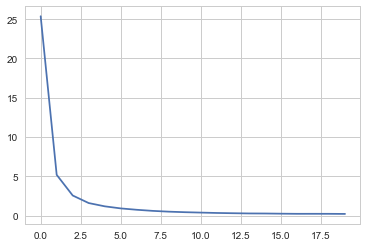

[  9.66244717e-01   4.47628752e-01  -4.43331371e-01  -1.03174457e-02
  -2.59375393e-03  -5.49478751e-03  -1.25011161e-02  -3.96974528e-03
  -2.26527060e-02  -8.08154191e-02   4.95412398e-05   1.02500762e-02
  -1.11936306e-03   1.28690354e-03  -2.22491937e-02  -6.50717319e-03
  -1.25235832e-02   1.39335108e-02  -5.02282800e-04   1.06179983e-02
   5.04372808e-03  -5.58095537e-03  -3.15270132e-03   2.17110042e-03
   4.50091950e-03   1.81757220e-02   1.18169528e-02   2.41309473e-02
  -4.49777400e-03  -7.47710382e-03   1.59926539e-02   4.19715660e-03
  -1.36919908e-02  -1.47600999e-03  -5.26303576e-02   4.90866328e-03
   3.81066149e-03  -7.04473410e-02   5.25906551e-03   2.77866426e-03
  -6.17144648e-03   1.04984290e-02   2.99994203e-02   3.56747276e-02
   1.52302342e-02   8.78361471e-04  -6.95489011e-03  -1.05367352e-02
   4.79425756e-02   1.14061021e-02]


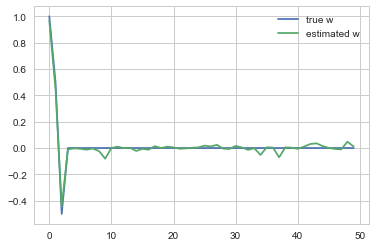

In [40]:
X = (np.random.random((N, D)) - 0.5) * 10
true_w = np.array([1, 0.5, -0.5] + [0]*(D-3))
Y = X.dot(true_w) + np.random.randn(N)*0.5

costs = []
w = np.random.normal(0, np.sqrt(1/D), D)
learning_rate = 0.001
l1 = 10.0

for i in range(20):
    Yhat = X.dot(w)
    delta = Yhat - Y
    w = w - learning_rate*(X.T.dot(delta) + l1*np.sign(w))
    mse = delta.dot(delta) / N
    costs.append(mse)
    
plt.plot(costs)
plt.show()
plt.plot(true_w, label='true w')
plt.plot(w, label='estimated w')
plt.legend()
print(w)


* We see that things that have to be zero are close to zero.
* Notice that in L2 regularization we solved for w in closed form. 
* However, for L1 regularization, we were not able to find w in closed form. So we used gradient descent.